### Linear Regression
The objective of linear regression is to minimize the cost function

$J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})^2 $ (vectorial form $J(\theta) = \frac{1}{2m} (X\theta - y)^T (X\theta - y)$)

where the hypothesis $h_\theta$ is given by the linear model

$$ h_\theta = \theta^T x = \theta_0 + \theta_1 x_1 $$
The model's parameters are the $\theta_j$ values. These are the values that need to be adjusted to minimize cost $J(\theta)$. 

#### Create Dataset 

Here I am going for a univariate case to make visulaization simple. 

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('Dataset.csv',index_col=0)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,ChanceOfAdmit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


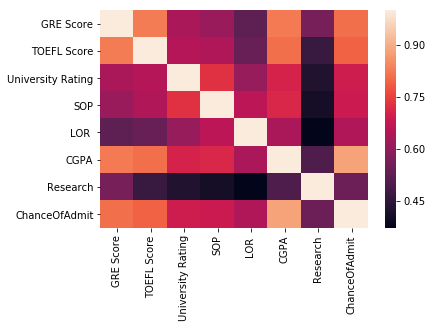

In [13]:
import seaborn as sns
sns.heatmap(df.corr())

### Exploratory Data Analysis

We can see from the above heatmap that our field of interest 'Chance of admit' has a positive correlation with all other fields. The most positive correlation is with the fields GRE score, TOEFL score and CGPA.

So here I will create two Linear Regression Models one considering all of the available fields as features and the other being picking up only the three most correlated fields and compare the results.

## Algorithm for Linear regression


Finding Theta using the Normal Equations¶
It is possible to show that the same optimized parameters found implemenating Gradient Descent can be calculated in an elegant, efficient and closed form, using linear algebra. Specifically:

$$\theta = (X^T X)^{-1} X^Ty$$
Using this formula does not require any feature scaling, and you will get an exact solution in one calculation: there is no "loop until convergence" like in gradient descent.

In [3]:
def normalEquation(X, y):
    return np.dot(np.dot(np.linalg.inv(np.dot(X.transpose(), X)), X.transpose()), y)

##### Algorithm 1 : 

Taking all fields in the feature vector 

In [4]:
X = df.drop(['ChanceOfAdmit'],axis=1).values
X

array([[337.  , 118.  ,   4.  , ...,   4.5 ,   9.65,   1.  ],
       [324.  , 107.  ,   4.  , ...,   4.5 ,   8.87,   1.  ],
       [316.  , 104.  ,   3.  , ...,   3.5 ,   8.  ,   1.  ],
       ...,
       [330.  , 120.  ,   5.  , ...,   5.  ,   9.56,   1.  ],
       [312.  , 103.  ,   4.  , ...,   5.  ,   8.43,   0.  ],
       [327.  , 113.  ,   4.  , ...,   4.5 ,   9.04,   0.  ]])

In [5]:
y = df['ChanceOfAdmit'].values.reshape(len(X),1)
y[:5]

array([[0.92],
       [0.76],
       [0.72],
       [0.8 ],
       [0.65]])

Now we need to find optimal weight matrix W (or theta)

$$\theta = (X^T X)^{-1} X^Ty$$

In [6]:
W = normalEquation(X,y)
W

array([[-0.00301052],
       [ 0.00332207],
       [ 0.01661279],
       [ 0.00818754],
       [ 0.01709575],
       [ 0.13395887],
       [ 0.0561087 ]])

Now we calulcate the MEAN Squared Error

In [7]:
MSE = np.linalg.norm(np.dot(X,W) - y)**2/len(X)
MSE

0.00461748190932025

##### Algorithm 2 : 

Taking top 3 fields which are most positively correlated in the feature vector 

In [8]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,ChanceOfAdmit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


Preparing data for matrix manipulation

In [9]:
X = df[['GRE Score', 'TOEFL Score', 'CGPA']].values
X[:5]

array([[337.  , 118.  ,   9.65],
       [324.  , 107.  ,   8.87],
       [316.  , 104.  ,   8.  ],
       [322.  , 110.  ,   8.67],
       [314.  , 103.  ,   8.21]])

In [10]:
y = df['ChanceOfAdmit'].values.reshape(len(y),1)
y[:5]

array([[0.92],
       [0.76],
       [0.72],
       [0.8 ],
       [0.65]])

In [11]:
W = normalEquation(X,y)
W

array([[-0.00502772],
       [ 0.00504637],
       [ 0.2067824 ]])

In [12]:
MSE = np.linalg.norm(np.dot(X,W) - y)**2/len(X)
MSE

0.006300871849570825

#### Rsults : 
We find that taking all of the feature vectors perform better in terms of MSE. This suggests that since the other fields are positively correlated they brinfg useful information for finding a better fit.